In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'monospace'
from matplotlib import collections as mc
import numpy as np
import math
import os
import sys

In [12]:
sys.path.append('..')

In [13]:
from Util import Globals
from Util import Parser

In [14]:
# https://stackoverflow.com/a/50860105/6819541
cmap = [[0.91510904, 0.55114749, 0.67037311],
   [0.91696411, 0.55081563, 0.66264366],
   [0.91870995, 0.55055664, 0.65485881],
   [0.92034498, 0.55037149, 0.64702356],
   [0.92186763, 0.55026107, 0.63914306],
   [0.92327636, 0.55022625, 0.63122259],
   [0.9245696 , 0.55026781, 0.62326754],
   [0.92574582, 0.5503865 , 0.6152834 ],
   [0.92680349, 0.55058299, 0.6072758 ],
   [0.92774112, 0.55085789, 0.59925045],
   [0.9285572 , 0.55121174, 0.59121319],
   [0.92925027, 0.551645  , 0.58316992],
   [0.92981889, 0.55215808, 0.57512667],
   [0.93026165, 0.55275127, 0.56708953],
   [0.93057716, 0.5534248 , 0.55906469],
   [0.93076407, 0.55417883, 0.55105838],
   [0.93082107, 0.55501339, 0.54307696],
   [0.93074689, 0.55592845, 0.53512681],
   [0.9305403 , 0.55692387, 0.52721438],
   [0.93020012, 0.55799943, 0.51934621],
   [0.92972523, 0.55915477, 0.51152885],
   [0.92911454, 0.56038948, 0.50376893],
   [0.92836703, 0.56170301, 0.49607312],
   [0.92748175, 0.56309471, 0.48844813],
   [0.9264578 , 0.56456383, 0.48090073],
   [0.92529434, 0.56610951, 0.47343769],
   [0.92399062, 0.56773078, 0.46606586],
   [0.92254595, 0.56942656, 0.45879209],
   [0.92095971, 0.57119566, 0.4516233 ],
   [0.91923137, 0.5730368 , 0.44456642],
   [0.91736048, 0.57494856, 0.4376284 ],
   [0.91534665, 0.57692945, 0.43081625],
   [0.91318962, 0.57897785, 0.42413698],
   [0.91088917, 0.58109205, 0.41759765],
   [0.90844521, 0.58327024, 0.41120533],
   [0.90585771, 0.58551053, 0.40496711],
   [0.90312676, 0.5878109 , 0.3988901 ],
   [0.90025252, 0.59016928, 0.39298143],
   [0.89723527, 0.5925835 , 0.38724821],
   [0.89407538, 0.59505131, 0.38169756],
   [0.89077331, 0.59757038, 0.37633658],
   [0.88732963, 0.60013832, 0.37117234],
   [0.88374501, 0.60275266, 0.36621186],
   [0.88002022, 0.6054109 , 0.36146209],
   [0.87615612, 0.60811044, 0.35692989],
   [0.87215369, 0.61084868, 0.352622  ],
   [0.86801401, 0.61362295, 0.34854502],
   [0.86373824, 0.61643054, 0.34470535],
   [0.85932766, 0.61926872, 0.3411092 ],
   [0.85478365, 0.62213474, 0.3377625 ],
   [0.85010767, 0.6250258 , 0.33467091],
   [0.84530131, 0.62793914, 0.3318397 ],
   [0.84036623, 0.63087193, 0.32927381],
   [0.8353042 , 0.63382139, 0.32697771],
   [0.83011708, 0.63678472, 0.32495541],
   [0.82480682, 0.63975913, 0.32321038],
   [0.81937548, 0.64274185, 0.32174556],
   [0.81382519, 0.64573011, 0.32056327],
   [0.80815818, 0.6487212 , 0.31966522],
   [0.80237677, 0.65171241, 0.31905244],
   [0.79648336, 0.65470106, 0.31872531],
   [0.79048044, 0.65768455, 0.31868352],
   [0.78437059, 0.66066026, 0.31892606],
   [0.77815645, 0.66362567, 0.31945124],
   [0.77184076, 0.66657827, 0.32025669],
   [0.76542634, 0.66951562, 0.3213394 ],
   [0.75891609, 0.67243534, 0.32269572],
   [0.75231298, 0.67533509, 0.32432138],
   [0.74562004, 0.6782126 , 0.32621159],
   [0.73884042, 0.68106567, 0.32836102],
   [0.73197731, 0.68389214, 0.33076388],
   [0.72503398, 0.68668995, 0.33341395],
   [0.7180138 , 0.68945708, 0.33630465],
   [0.71092018, 0.69219158, 0.33942908],
   [0.70375663, 0.69489159, 0.34278007],
   [0.69652673, 0.69755529, 0.34635023],
   [0.68923414, 0.70018097, 0.35013201],
   [0.6818826 , 0.70276695, 0.35411772],
   [0.67447591, 0.70531165, 0.3582996 ],
   [0.667018  , 0.70781354, 0.36266984],
   [0.65951284, 0.71027119, 0.36722061],
   [0.65196451, 0.71268322, 0.37194411],
   [0.64437719, 0.71504832, 0.37683259],
   [0.63675512, 0.71736525, 0.38187838],
   [0.62910269, 0.71963286, 0.38707389],
   [0.62142435, 0.72185004, 0.39241165],
   [0.61372469, 0.72401576, 0.39788432],
   [0.60600841, 0.72612907, 0.40348469],
   [0.59828032, 0.72818906, 0.40920573],
   [0.59054536, 0.73019489, 0.41504052],
   [0.58280863, 0.73214581, 0.42098233],
   [0.57507535, 0.7340411 , 0.42702461],
   [0.5673509 , 0.7358801 , 0.43316094],
   [0.55964082, 0.73766224, 0.43938511],
   [0.55195081, 0.73938697, 0.44569104],
   [0.54428677, 0.74105381, 0.45207286],
   [0.53665478, 0.74266235, 0.45852483],
   [0.52906111, 0.74421221, 0.4650414 ],
   [0.52151225, 0.74570306, 0.47161718],
   [0.5140149 , 0.74713464, 0.47824691],
   [0.506576  , 0.74850672, 0.48492552],
   [0.49920271, 0.74981912, 0.49164808],
   [0.49190247, 0.75107171, 0.4984098 ],
   [0.48468293, 0.75226438, 0.50520604],
   [0.47755205, 0.7533971 , 0.51203229],
   [0.47051802, 0.75446984, 0.5188842 ],
   [0.46358932, 0.75548263, 0.52575752],
   [0.45677469, 0.75643553, 0.53264815],
   [0.45008317, 0.75732863, 0.5395521 ],
   [0.44352403, 0.75816207, 0.54646551],
   [0.43710682, 0.758936  , 0.55338462],
   [0.43084133, 0.7596506 , 0.56030581],
   [0.42473758, 0.76030611, 0.56722555],
   [0.41880579, 0.76090275, 0.5741404 ],
   [0.41305637, 0.76144081, 0.58104704],
   [0.40749984, 0.76192057, 0.58794226],
   [0.40214685, 0.76234235, 0.59482292],
   [0.39700806, 0.7627065 , 0.60168598],
   [0.39209414, 0.76301337, 0.6085285 ],
   [0.38741566, 0.76326334, 0.6153476 ],
   [0.38298304, 0.76345681, 0.62214052],
   [0.37880647, 0.7635942 , 0.62890454],
   [0.37489579, 0.76367593, 0.63563704],
   [0.37126045, 0.76370246, 0.64233547],
   [0.36790936, 0.76367425, 0.64899736],
   [0.36485083, 0.76359176, 0.6556203 ],
   [0.36209245, 0.76345549, 0.66220193],
   [0.359641  , 0.76326594, 0.66873999],
   [0.35750235, 0.76302361, 0.67523226],
   [0.35568141, 0.76272903, 0.68167659],
   [0.35418202, 0.76238272, 0.68807086],
   [0.3530069 , 0.76198523, 0.69441305],
   [0.35215761, 0.7615371 , 0.70070115],
   [0.35163454, 0.76103888, 0.70693324],
   [0.35143685, 0.76049114, 0.71310742],
   [0.35156253, 0.75989444, 0.71922184],
   [0.35200839, 0.75924936, 0.72527472],
   [0.3527701 , 0.75855647, 0.73126429],
   [0.3538423 , 0.75781637, 0.73718884],
   [0.3552186 , 0.75702964, 0.7430467 ],
   [0.35689171, 0.75619688, 0.74883624],
   [0.35885353, 0.75531868, 0.75455584],
   [0.36109522, 0.75439565, 0.76020396],
   [0.36360734, 0.75342839, 0.76577905],
   [0.36637995, 0.75241752, 0.77127961],
   [0.3694027 , 0.75136364, 0.77670417],
   [0.37266493, 0.75026738, 0.7820513 ],
   [0.37615579, 0.74912934, 0.78731957],
   [0.37986429, 0.74795017, 0.79250759],
   [0.38377944, 0.74673047, 0.797614  ],
   [0.38789026, 0.74547088, 0.80263746],
   [0.3921859 , 0.74417203, 0.80757663],
   [0.39665568, 0.74283455, 0.81243022],
   [0.40128912, 0.74145908, 0.81719695],
   [0.406076  , 0.74004626, 0.82187554],
   [0.41100641, 0.73859673, 0.82646476],
   [0.41607073, 0.73711114, 0.83096336],
   [0.4212597 , 0.73559013, 0.83537014],
   [0.42656439, 0.73403435, 0.83968388],
   [0.43197625, 0.73244447, 0.8439034 ],
   [0.43748708, 0.73082114, 0.84802751],
   [0.44308905, 0.72916502, 0.85205505],
   [0.44877471, 0.72747678, 0.85598486],
   [0.45453694, 0.72575709, 0.85981579],
   [0.46036897, 0.72400662, 0.8635467 ],
   [0.4662644 , 0.72222606, 0.86717646],
   [0.47221713, 0.72041608, 0.87070395],
   [0.47822138, 0.71857738, 0.87412804],
   [0.4842717 , 0.71671065, 0.87744763],
   [0.4903629 , 0.71481659, 0.88066162],
   [0.49649009, 0.71289591, 0.8837689 ],
   [0.50264864, 0.71094931, 0.88676838],
   [0.50883417, 0.70897752, 0.88965898],
   [0.51504253, 0.70698127, 0.89243961],
   [0.52126981, 0.70496128, 0.8951092 ],
   [0.52751231, 0.70291829, 0.89766666],
   [0.53376652, 0.70085306, 0.90011093],
   [0.54002912, 0.69876633, 0.90244095],
   [0.54629699, 0.69665888, 0.90465565],
   [0.55256715, 0.69453147, 0.90675397],
   [0.55883679, 0.69238489, 0.90873487],
   [0.56510323, 0.69021993, 0.9105973 ],
   [0.57136396, 0.68803739, 0.91234022],
   [0.57761655, 0.68583808, 0.91396258],
   [0.58385872, 0.68362282, 0.91546336],
   [0.59008831, 0.68139246, 0.91684154],
   [0.59630323, 0.67914782, 0.9180961 ],
   [0.60250152, 0.67688977, 0.91922603],
   [0.60868128, 0.67461918, 0.92023033],
   [0.61484071, 0.67233692, 0.921108  ],
   [0.62097809, 0.67004388, 0.92185807],
   [0.62709176, 0.66774097, 0.92247957],
   [0.63318012, 0.66542911, 0.92297153],
   [0.63924166, 0.66310923, 0.92333301],
   [0.64527488, 0.66078227, 0.92356308],
   [0.65127837, 0.65844919, 0.92366082],
   [0.65725076, 0.65611096, 0.92362532],
   [0.66319071, 0.65376857, 0.92345572],
   [0.66909691, 0.65142302, 0.92315115],
   [0.67496813, 0.64907533, 0.92271076],
   [0.68080311, 0.64672651, 0.92213374],
   [0.68660068, 0.64437763, 0.92141929],
   [0.69235965, 0.64202973, 0.92056665],
   [0.69807888, 0.6396839 , 0.91957507],
   [0.70375724, 0.63734122, 0.91844386],
   [0.70939361, 0.63500279, 0.91717232],
   [0.7149869 , 0.63266974, 0.91575983],
   [0.72053602, 0.63034321, 0.91420578],
   [0.72603991, 0.62802433, 0.9125096 ],
   [0.7314975 , 0.62571429, 0.91067077],
   [0.73690773, 0.62341425, 0.9086888 ],
   [0.74226956, 0.62112542, 0.90656328],
   [0.74758193, 0.61884899, 0.90429382],
   [0.75284381, 0.6165862 , 0.90188009],
   [0.75805413, 0.61433829, 0.89932181],
   [0.76321187, 0.6121065 , 0.89661877],
   [0.76831596, 0.6098921 , 0.89377082],
   [0.77336536, 0.60769637, 0.89077786],
   [0.77835901, 0.6055206 , 0.88763988],
   [0.78329583, 0.6033661 , 0.88435693],
   [0.78817477, 0.60123418, 0.88092913],
   [0.79299473, 0.59912616, 0.87735668],
   [0.79775462, 0.59704339, 0.87363986],
   [0.80245335, 0.59498722, 0.86977904],
   [0.8070898 , 0.592959  , 0.86577468],
   [0.81166284, 0.5909601 , 0.86162732],
   [0.81617134, 0.5889919 , 0.8573376 ],
   [0.82061414, 0.58705579, 0.85290625],
   [0.82499007, 0.58515315, 0.84833413],
   [0.82929796, 0.58328538, 0.84362217],
   [0.83353661, 0.58145389, 0.83877142],
   [0.8377048 , 0.57966009, 0.83378306],
   [0.8418013 , 0.57790538, 0.82865836],
   [0.84582486, 0.57619119, 0.82339871],
   [0.84977422, 0.57451892, 0.81800565],
   [0.85364809, 0.57289   , 0.8124808 ],
   [0.85744519, 0.57130585, 0.80682595],
   [0.86116418, 0.56976788, 0.80104298],
   [0.86480373, 0.56827749, 0.79513394],
   [0.86836249, 0.56683612, 0.789101  ],
   [0.87183909, 0.56544515, 0.78294645],
   [0.87523214, 0.56410599, 0.77667274],
   [0.87854024, 0.56282002, 0.77028247],
   [0.88176195, 0.56158863, 0.76377835],
   [0.88489584, 0.56041319, 0.75716326],
   [0.88794045, 0.55929505, 0.75044023],
   [0.89089432, 0.55823556, 0.74361241],
   [0.89375596, 0.55723605, 0.73668312],
   [0.89652387, 0.55629781, 0.72965583],
   [0.89919653, 0.55542215, 0.72253414],
   [0.90177242, 0.55461033, 0.71532181],
   [0.90425   , 0.55386358, 0.70802274],
   [0.90662774, 0.55318313, 0.70064098],
   [0.90890408, 0.55257016, 0.69318073],
   [0.91107745, 0.55202582, 0.68564633],
   [0.91314629, 0.55155124, 0.67804225]]

In [15]:
len(cmap)

256

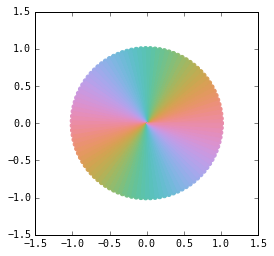

In [16]:
theta = np.linspace(0, 2*np.pi, 100)

# the radius of the circle
r = 1
# compute x1 and x2
x = r * np.cos(theta)
y = r * np.sin(theta)

angles = [(np.rad2deg(np.arctan2(p[1], p[0]))) for p in zip(x, y)]
colors = [cmap[int(angle / 180 * 256)] for angle in angles]


fig, ax = plt.subplots(1)
ax.scatter(x, y, color=colors)
ax.set_aspect(1)

triangles = []
points = list(zip(x,y))
for i in range(len(x)):
    tri = plt.Polygon([(0,0), points[i-1], points[i]], color=colors[i])
    ax.add_patch(tri)

In [19]:
dataset_id = 'WorldBankExports'
dataframes = Parser.parse_dataset(dataset_id)

.............

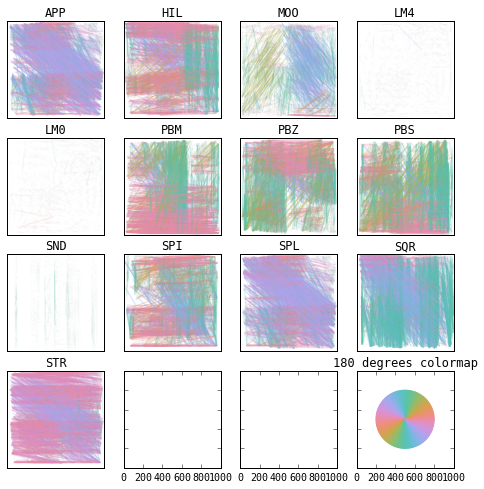

In [20]:
nrow = 4
ncol = 4
fig, axs = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(8, 8))
plt.setp(axs.flat, aspect=1.0, adjustable='box-forced')

# fig.suptitle('Aspect Ratios', fontsize=14)
# fig.subplots_adjust(top=0.95)

technique_ids = sorted(list(Globals.acronyms.keys()))
for i, technique_id in enumerate(technique_ids):
    ax = fig.axes[i]
    technique = technique_ids[i]

    # ax.set_title(technique)
    ax.set_title(Globals.acronyms[technique])
    print('.', end='')

    centroids = {}
    for df in dataframes[technique_id]:
        n_revisions = len(dataframes[technique_id])
        for index, row in df.iterrows():
            c_x = row['rx'] + row['rw'] / 2
            c_y = row['ry'] + row['rh'] / 2
            if index in centroids:
                centroids[index].append((c_x, c_y))  # Append tuple
            else:
                centroids[index] = [(c_x, c_y)]  # Initialize list for a new entry

    lines = []
    colors = []
    for key, centroid_list in centroids.items():
        for i in range(len(centroid_list) - 1):
            a = centroid_list[i]
            b = centroid_list[i + 1]
            lines.append((a, b))  # Add line segment
            alpha = math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2) / math.sqrt(1000**2 + 1000**2)  # Assuming we are plotting the treemap in a 1000x1000 pixel frame
            alpha = min(1, alpha * (5 / math.sqrt(n_revisions)))
            angle = np.rad2deg(np.arctan2(b[1] - a[1], b[0] - a[0]))
            cmap_index = int(angle / 180 * 255) 

            c = cmap[cmap_index].copy()
            c.append(alpha)
            colors.append(c)  # Set color for line segment

    lc = mc.LineCollection(lines, colors=colors, linewidths=1)
    ax.add_collection(lc)
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 1000)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)    
    
theta = np.linspace(0, 2*np.pi, 100)
# the radius of the circle
r = 300
# compute x1 and x2
x = 500 + r * np.cos(theta)
y = 500 + r * np.sin(theta)

angles = [(np.rad2deg(np.arctan2(500 - p[1], 500 - p[0]))) for p in zip(x, y)]
colors = [cmap[int(angle / 180 * 255)] for angle in angles]

triangles = []
points = list(zip(x,y))
for i in range(len(x)):
    tri = plt.Polygon([(500, 500), points[i-1], points[i]], color=colors[i])
    fig.axes[-1].add_patch(tri)
fig.axes[-1].set_title('180 degrees colormap')

fig.savefig('dir-' + dataset_id + '.png', dpi=200)